In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title
import pandas as pd
import numpy as np

In [ ]:
# @title
data = pd.read_csv("/content/drive/MyDrive/Concepts and technology of AI/week3/Titanic-Dataset (1).csv")

In [ ]:
# @title
#Problem 1: Classification with k-NN from Scratch
# Drop categorical columns except 'Survived'
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])

In [ ]:
# @title
# Handle missing values
missing_info = data.isnull().sum() / len(data) * 100
for column in data.columns:
    if missing_info[column] > 10:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)

/tmp/ipython-input-2408233555.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [ ]:
# @title
# Separate features and target
X = data.drop(columns=['Survived']).values
y = data['Survived'].values

In [ ]:
# @title
# Train-test split (scratch)
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    test_idx, train_idx = indices[:test_size], indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

In [ ]:
# @title
# Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [ ]:
# @title
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    nearest_idx = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_idx]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])


In [ ]:
# @title
# Accuracy
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

In [ ]:
# @title
# Evaluate
predictions = knn_predict(X_test, X_train, y_train, k=3)
print(f"Problem 1 - Accuracy: {compute_accuracy(y_test, predictions):.2f}%")

Problem 1 - Accuracy: 61.80%


In [ ]:
# @title
#problem 2 Experimentation with Scaling (Manual with NumPy)
# Manual scaling: (x - mean) / std
X_values = data.drop(columns=['Survived']).values
X_mean, X_std = X_values.mean(axis=0), X_values.std(axis=0)
X_scaled = (X_values - X_mean) / X_std
y = data['Survived'].values

# Train-test split on scaled data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)

# Evaluate KNN on scaled data
predictions_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
print(f"Problem 2 - Accuracy (Original): {compute_accuracy(y_test, predictions):.2f}%")
print(f"Problem 2 - Accuracy (Scaled): {compute_accuracy(y_test_s, predictions_scaled):.2f}%")


Problem 2 - Accuracy (Original): 61.80%
Problem 2 - Accuracy (Scaled): 70.41%


k=1, Accuracy=58.43%, Time=1.1450s
k=2, Accuracy=62.55%, Time=1.1364s
k=3, Accuracy=61.80%, Time=1.7771s
k=4, Accuracy=63.30%, Time=1.9048s
k=5, Accuracy=64.42%, Time=1.4586s
k=6, Accuracy=64.42%, Time=1.0825s
k=7, Accuracy=65.17%, Time=1.0757s
k=8, Accuracy=64.42%, Time=1.0564s
k=9, Accuracy=65.17%, Time=1.1093s
k=10, Accuracy=64.04%, Time=1.1146s
k=11, Accuracy=64.04%, Time=1.0853s
k=12, Accuracy=64.79%, Time=1.0749s
k=13, Accuracy=64.79%, Time=1.0680s
k=14, Accuracy=65.92%, Time=1.3555s
k=15, Accuracy=65.17%, Time=1.8613s


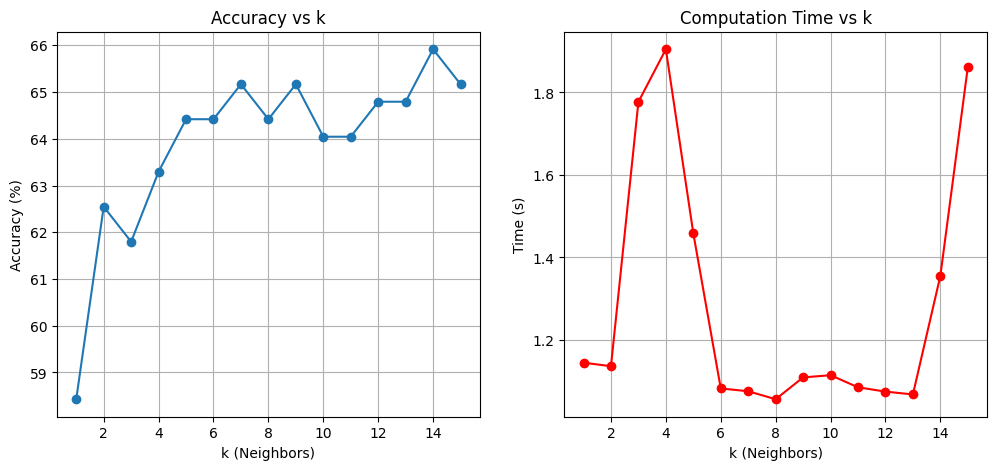

k=1, Accuracy=65.54%, Time=1.5920s
k=2, Accuracy=67.04%, Time=1.1205s
k=3, Accuracy=70.41%, Time=1.1804s
k=4, Accuracy=69.29%, Time=1.0508s
k=5, Accuracy=71.16%, Time=1.0736s
k=6, Accuracy=69.66%, Time=1.0741s
k=7, Accuracy=70.79%, Time=1.0775s
k=8, Accuracy=68.91%, Time=1.0628s
k=9, Accuracy=70.04%, Time=1.1144s
k=10, Accuracy=68.91%, Time=1.2976s
k=11, Accuracy=71.16%, Time=1.9298s
k=12, Accuracy=71.91%, Time=1.9148s
k=13, Accuracy=70.79%, Time=1.0782s
k=14, Accuracy=70.79%, Time=1.0776s
k=15, Accuracy=71.91%, Time=1.1188s


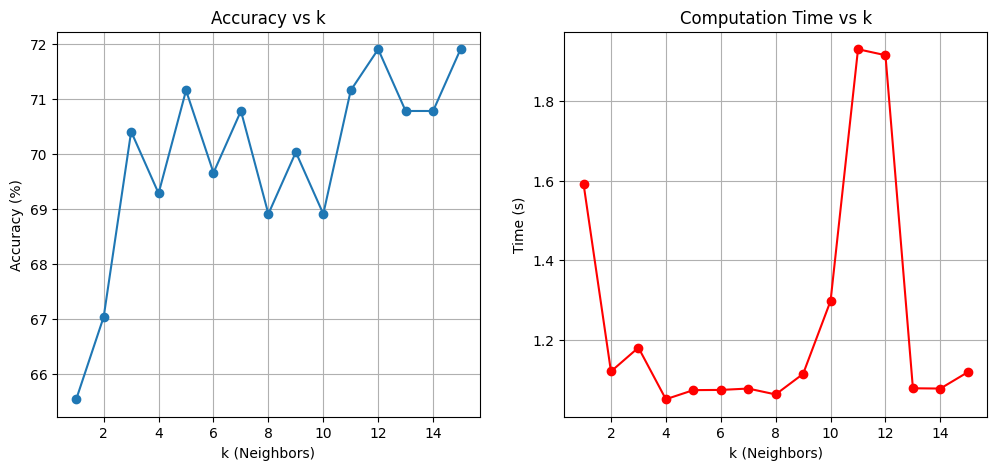

({1: np.float64(65.54307116104869),
  2: np.float64(67.04119850187266),
  3: np.float64(70.4119850187266),
  4: np.float64(69.28838951310861),
  5: np.float64(71.16104868913857),
  6: np.float64(69.66292134831461),
  7: np.float64(70.78651685393258),
  8: np.float64(68.91385767790263),
  9: np.float64(70.0374531835206),
  10: np.float64(68.91385767790263),
  11: np.float64(71.16104868913857),
  12: np.float64(71.91011235955057),
  13: np.float64(70.78651685393258),
  14: np.float64(70.78651685393258),
  15: np.float64(71.91011235955057)},
 {1: 1.592038869857788,
  2: 1.12046217918396,
  3: 1.1803619861602783,
  4: 1.0507524013519287,
  5: 1.073570966720581,
  6: 1.074110746383667,
  7: 1.0775368213653564,
  8: 1.0627551078796387,
  9: 1.1144084930419922,
  10: 1.2976391315460205,
  11: 1.9298055171966553,
  12: 1.9147591590881348,
  13: 1.0782275199890137,
  14: 1.0775675773620605,
  15: 1.1187515258789062})

In [ ]:
# @title
#problem 3 Experimentation with Different k
import time
import matplotlib.pyplot as plt

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies, times = {}, {}
    for k in k_values:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k=k)
        end = time.time()
        accuracies[k] = compute_accuracy(y_test, preds)
        times[k] = end - start
        print(f"k={k}, Accuracy={accuracies[k]:.2f}%, Time={times[k]:.4f}s")

    # Plot accuracy
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
    plt.xlabel("k (Neighbors)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy vs k")
    plt.grid(True)

    # Plot time
    plt.subplot(1,2,2)
    plt.plot(list(times.keys()), list(times.values()), marker='o', color='red')
    plt.xlabel("k (Neighbors)")
    plt.ylabel("Time (s)")
    plt.title("Computation Time vs k")
    plt.grid(True)

    plt.show()
    return accuracies, times

# Run experiment for original and scaled data
k_values = range(1, 16)
experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
experiment_knn_k_values(X_train_s, y_train_s, X_test_s, y_test_s, k_values)


In [ ]:
# @title
#problem 4
##Challenges of KNN:
# Large datasets:Slow, because distances must be computed for every test point.
# High-dimensional data:Distances lose meaning (curse of dimensionality).
# Imbalanced classes: Majority class dominates votes.

## Strategies to Improve Efficiency:
# Approximate nearest neighbors (ANN):KD-Trees, Ball Trees, hashing methods.
# Dimensionality reduction:PCA or feature selection to reduce irrelevant features.
# Weighted voting:Give closer neighbors more influence.
# Scaling:Standardize features to avoid dominance by large-valued features.
